Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range




The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Steps to Follow for the Project: The dataset contains 14 features and 32561 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [84]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [85]:
# Loading the dataset downloaded from kaggle
zomato_dt=pd.read_csv('zomato.csv',encoding="latin-1")
zomato_dt.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [86]:
zomato_dt.shape # to determine the shape of the dataset

(9551, 21)

In [87]:
zomato_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [88]:
# groupby column data types
zomato_dt.columns.groupby(zomato_dt.dtypes)

{int64: ['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate rating'], object: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']}

In [89]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[0], len(zomato_dt.columns.groupby(zomato_dt.dtypes)[list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[1], len(zomato_dt.columns.groupby(zomato_dt.dtypes)[list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[1]])))
print("No of columns for {} is {}.".format(list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[2], len(zomato_dt.columns.groupby(zomato_dt.dtypes)[list(zomato_dt.columns.groupby(zomato_dt.dtypes).keys())[2]])))

No of columns for int64 is 5.
No of columns for float64 is 3.
No of columns for object is 13.


In [90]:
# importing the second dataset

In [91]:
Country_dt = pd.read_excel("Country-Code.xlsx")
Country_dt.tail(5)

,Country Code,Country
10,191,Sri Lanka
11,208,Turkey
12,214,UAE
13,215,United Kingdom
14,216,United States


In [92]:
Country_dt.shape # to determine the shape of the dataset

(15, 2)

In [93]:
# Time to merge the two dataset together for better analysis and to determine the country and their code
Zomato_ct_dt=pd.merge(zomato_dt,Country_dt,on='Country Code',how='left')
Zomato_ct_dt.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [94]:
Zomato_ct_dt.shape

(9551, 22)

In [95]:
# groupby column data types
Zomato_ct_dt.columns.groupby(zomato_dt.dtypes)

{int64: ['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate rating'], object: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']}

In [96]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(Zomato_ct_dt.columns.groupby(Zomato_ct_dt.dtypes).keys())[0], len(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes)[list(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(Zomato_ct_dt.columns.groupby(Zomato_ct_dt.dtypes).keys())[1], len(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes)[list(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes).keys())[1]])))
print("No of columns for {} is {}.".format(list(Zomato_ct_dt.columns.groupby(Zomato_ct_dt.dtypes).keys())[2], len(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes)[list(Zomato_ct_dt.columns.groupby(zomato_dt.dtypes).keys())[2]])))

No of columns for int64 is 5.
No of columns for float64 is 3.
No of columns for object is 13.


# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [97]:
# Checking for null values
Zomato_ct_dt.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [29]:
Zomato_ct_dt['Cuisines']=Zomato_ct_dt['Cuisines'].fillna('NaN')

In [31]:
# Checking presnce of ? in dataset
Zomato_ct_dt.isin(['?']).sum().any()

False

In [20]:
#There is no Missing values


In [32]:
# Checking for duplicated values since the dataset is large
Zomato_ct_dt.duplicated().sum()


0

<AxesSubplot:>

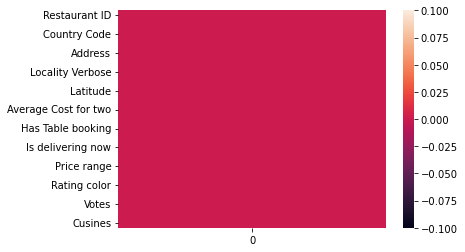

In [33]:
# Using Heat map to check for null values
sns.heatmap(Zomato_ct_dt.isnull().sum().to_frame())

# Univarite Analysis

In [34]:
new_Zomato_ct_dt=Zomato_ct_dt.copy()

In [36]:
new_Zomato_ct_dt.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cusines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,"French, Japanese, Desserts"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,"Seafood, Asian, Filipino, Indian"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,"Japanese, Sushi"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,"Japanese, Korean"


In [107]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
Cat_Var = ['Country','Cusines','Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
le = LabelEncoder()
for i in Cat_Var:
    new_Zomato_ct_dt[i] = le.fit_transform(new_Zomato_ct_dt[i])
new_Zomato_ct_dt.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cusines
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,0,0,0,3,4.8,0,1,1.196378,6,920
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,0,0,0,3,4.5,0,1,1.519401,6,1111
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1672,...,0,0,0,4,4.4,1,5,1.119737,6,1672
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,4,4.9,0,1,1.272970,6,1126
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,0,0,4,4.8,0,1,1.036350,6,1122


In [108]:
new_Zomato_ct_dt.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cusines
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9.551000e+03,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.877081,...,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,-1.187663e-15,3.736781,989.877081
std,8.791521e+06,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.570102,...,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,1.000052e+00,2.651963,514.570102
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,-1.609539e+00,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.000000,...,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,-7.623545e-01,3.000000,497.000000
50%,6.004089e+06,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.000000,...,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,4.939859e-02,3.000000,1127.000000
75%,1.835229e+07,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1354.500000,...,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,7.554765e-01,3.000000,1354.500000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.000000,...,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,3.044022e+00,14.000000,1825.000000


# Univarite Analysis

In [40]:
numerical_feature = [feature for feature in new_Zomato_ct_dt.columns if new_Zomato_ct_dt[feature].dtypes != 'O']

In [43]:
discrete_feature=[feature for feature in numerical_feature if len( new_Zomato_ct_dt[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

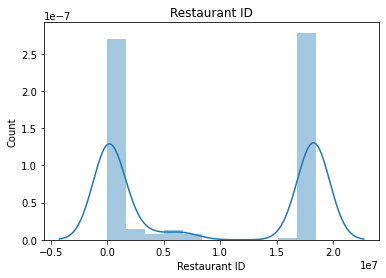

<Figure size 1080x1080 with 0 Axes>

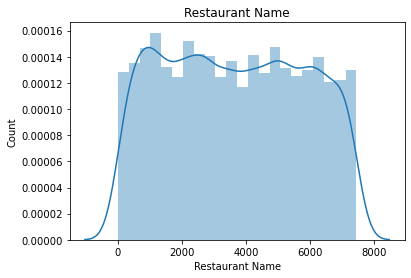

<Figure size 1080x1080 with 0 Axes>

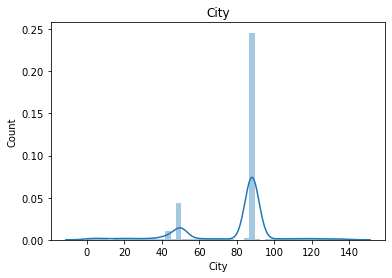

<Figure size 1080x1080 with 0 Axes>

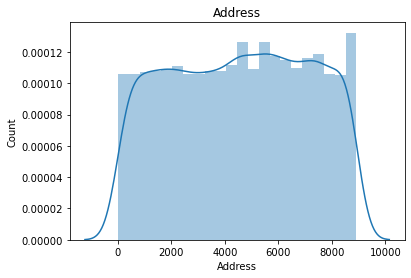

<Figure size 1080x1080 with 0 Axes>

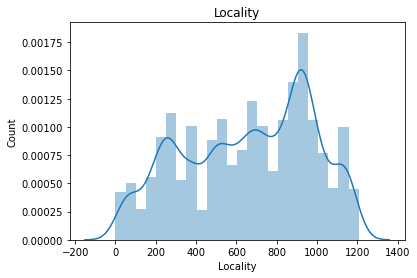

<Figure size 1080x1080 with 0 Axes>

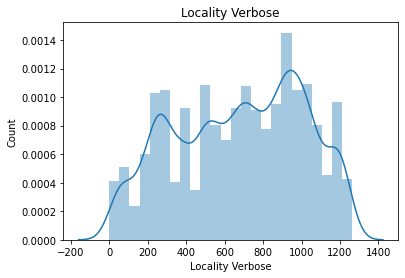

<Figure size 1080x1080 with 0 Axes>

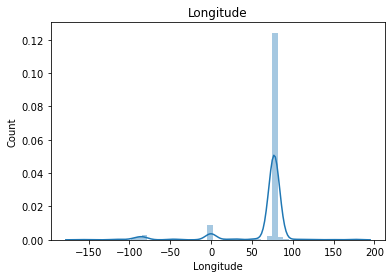

<Figure size 1080x1080 with 0 Axes>

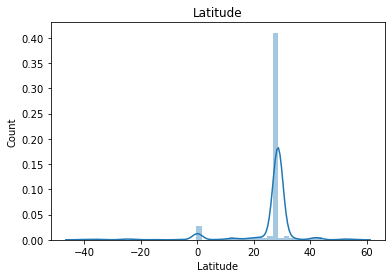

<Figure size 1080x1080 with 0 Axes>

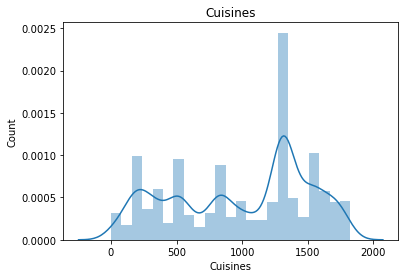

<Figure size 1080x1080 with 0 Axes>

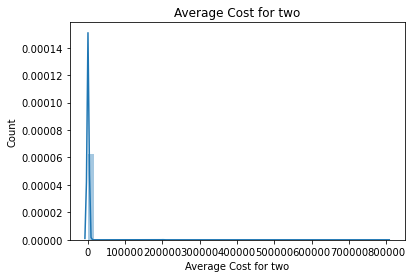

<Figure size 1080x1080 with 0 Axes>

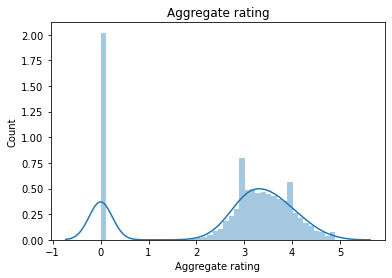

<Figure size 1080x1080 with 0 Axes>

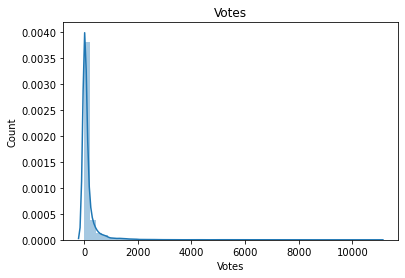

<Figure size 1080x1080 with 0 Axes>

In [44]:
# visualize 
for feature in continuous_feature:
    #data=df.copy()
    data=new_Zomato_ct_dt
    sns.distplot(new_Zomato_ct_dt[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [46]:
# Determine the unique values for each region
Country_value = new_Zomato_ct_dt["Country"].value_counts()
Country_value

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

                           Target Variable Distribution                          


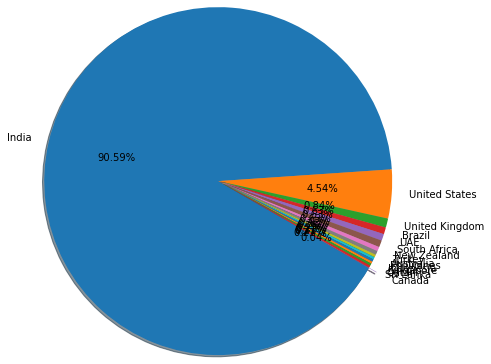

In [47]:
labels = new_Zomato_ct_dt["Country"].value_counts().index
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(new_Zomato_ct_dt["Country"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

Text(0, 0.5, 'info')

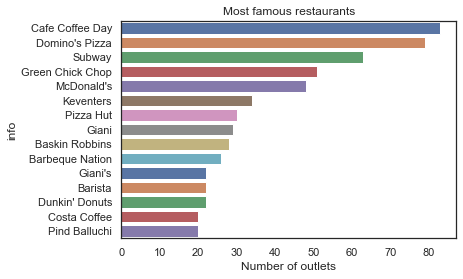

In [68]:
info=Zomato_ct_dt['Restaurant Name'].value_counts()[:15]
sns.barplot(x=info,y=info.index,palette='deep')
plt.title("Most famous restaurants")
plt.xlabel("Number of outlets")
plt.ylabel("info")

# Bivarite Analysis

Text(0, 0.5, 'Rating')

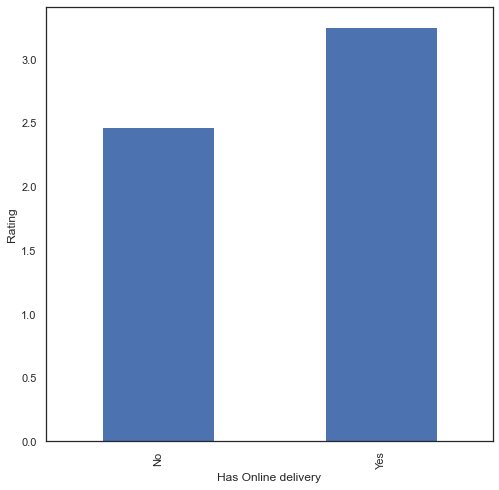

In [71]:
plt.figure(figsize=(8,8))
Zomato_ct_dt.groupby('Has Online delivery')['Aggregate rating'].mean().plot.bar()
plt.ylabel('Rating')

# Multivarite Analysis

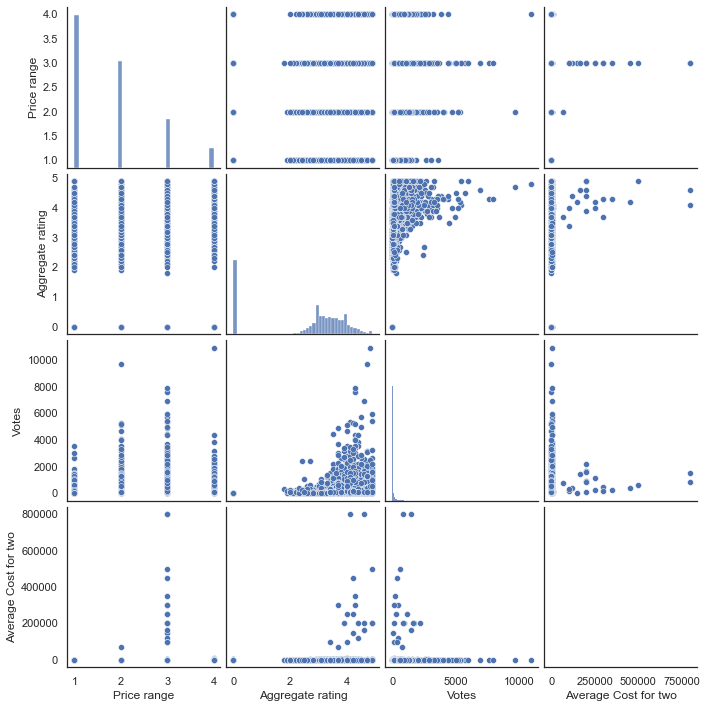

In [75]:
#Pairplot of all numerical variables
sns.pairplot(Zomato_ct_dt,vars=['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two'],palette="coolwarm")
plt.show()
#plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

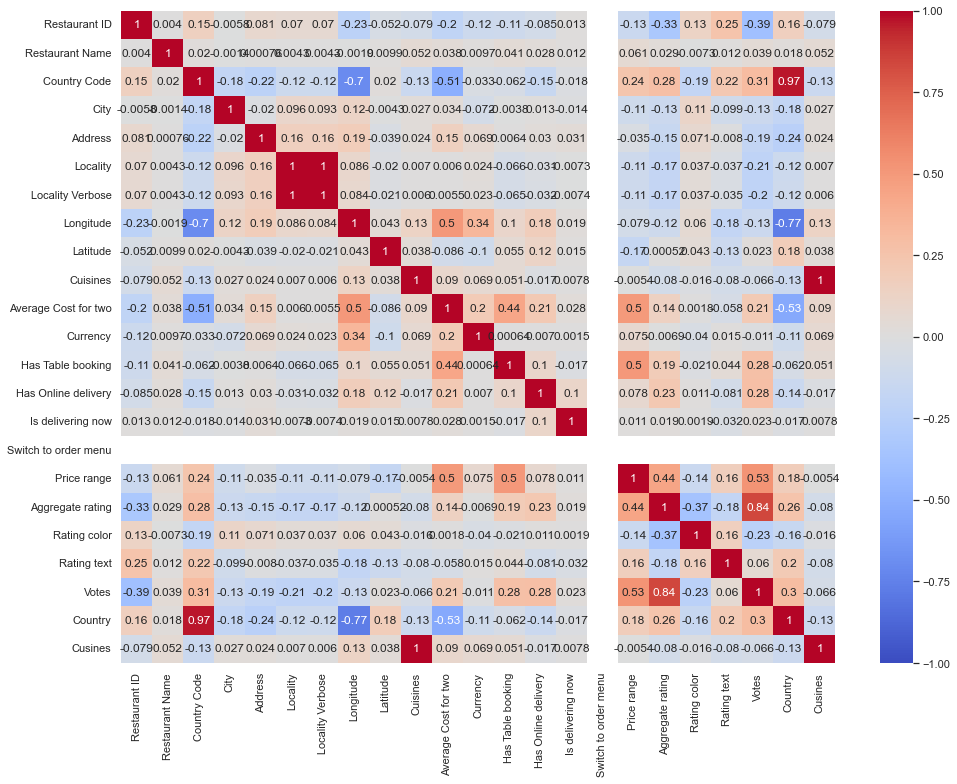

In [109]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(new_Zomato_ct_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=new_Zomato_ct_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

price  range, aggregate rating, rating color, rating text and Votes have positive corelation

In [110]:

# Checking for Outliers
# Checking for skewness of the data to determine outliers
new_Zomato_ct_dt.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306726
Average Cost for two     0.381610
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    0.026434
Country                  3.312721
Cusines                 -0.306726
dtype: float64

In [111]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['Average Cost for two','Is delivering now','Votes']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
new_Zomato_ct_dt[skew] = scaler.fit_transform(new_Zomato_ct_dt[skew].values)

In [112]:
new_Zomato_ct_dt.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306726
Average Cost for two     0.349188
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    0.029437
Country                  3.312721
Cusines                 -0.306726
dtype: float64

# Data Preprocessing for Classification problem fort Task 1


In [113]:
# Separating feature data and Label data
X = new_Zomato_ct_dt.drop(['Is delivering now','Average Cost for two'],axis=1)
y= new_Zomato_ct_dt['Average Cost for two']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cusines
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,3,4.8,0,1,1.196807,6,920
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,3,4.5,0,1,1.520535,6,1111
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1672,...,1,0,0,4,4.4,1,5,1.120016,6,1672
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,4,4.9,0,1,1.273555,6,1126
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,4,4.8,0,1,1.036474,6,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1814,...,0,0,0,3,4.1,1,5,1.668810,11,1814
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1825,...,0,0,0,3,4.2,1,5,1.809388,11,1825
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,0,0,0,4,3.7,5,2,1.578157,11,1110
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1658,...,0,0,0,4,4.0,1,5,1.738083,11,1658


In [114]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7640, 21), (1911, 21), (7640,), (1911,))

# Build/Test multiple models

In [129]:
#Using Logistic Regression to  train a logistic regression model on the training set
lreg = LinearRegression()
lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(1911,)

In [130]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.2982752377872594
Mean squared error  => 0.30130121980786867
Root Mean squared error  => 0.548909117985727
R2 Score  => 69.2611121735598
Accuracy Score of Testing Data is => 71.07


In [147]:
#Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(X_train,y_train)
#Predicting the test set result
y_pred_svm=svm.predict(X_test)
y_pred_svm.shape

(1911,)

In [148]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_svm))
print('\n')

Mean squared error: 0.2


Mean absolute error: 0.24


R2 Score: 0.82




In [149]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor() #
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred.shape

(1911,)

In [150]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,clf_pred))
print('\n')

Mean squared error: 0.1


Mean absolute error: 0.20


R2 Score: 0.91




In [151]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(X_train, y_train)
et_xgb = xgbreg.predict(X_test)
et_xgb.shape

(1911,)

In [152]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,et_xgb))
print('\n')

Mean squared error: 0.1


Mean absolute error: 0.20


R2 Score: 0.90




# Cross Validation for the Models

In [153]:
k_folds = KFold(n_splits = 5)

In [154]:
LR_scores = cross_val_score(lreg, X_Scalar, y, cv = k_folds)
svm_scores = cross_val_score(svm, X_Scalar, y, cv = k_folds)
clf_scores = cross_val_score(clf, X_Scalar, y, cv = k_folds)
xgbreg_scores= cross_val_score(xgbreg, X_Scalar, y, cv = k_folds)

#print("Cross Validation Scores: ", scores)
print("Average CV Score for Linear Regression is : ", LR_scores.mean()*100)
print('\n')
print("Average CV Score for Support Vector Machine is : ", svm_scores.mean()*100)
print('\n')
print("Average CV Score for Random Forest Regressor  is : ", clf_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boosting Classifier is : ", xgbreg_scores.mean()*100)

Average CV Score for Linear Regression is :  48.989875153211244


Average CV Score for Support Vector Machine is :  59.33780348448667


Average CV Score for Random Forest Regressor  is :  61.7008440342176


Average CV Score for Gradient Boosting Classifier is :  69.334355130356


In [156]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,y):
    rmse =- (cross_val_score(model, X_Scalar,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
          SVR(kernel='rbf'),
         RandomForestRegressor(),
         XGBRegressor(random_state = 0),]
          
          
names = ['LR', 'svm','RF','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 61.6723, 69.869090
svm  : 51.6761, 52.668414
RF  : 51.5114, 55.378830
xgbreg  : 36.5949, 37.248871


# Hyper Parameter Tuning : GridSearchCV for Task 1

In [157]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [158]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)


RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9,
                      n_estimators=150)
Best score: 0.8455534598683878
Best params: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 150}


In [163]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid.shape

(1911,)

In [165]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('r2_score:',r2_score(y_pred_grid,y_test)*100)

MSE: 0.1706003594634638
MAE: 0.2832932187678456
r2_score: 77.46509965415316


<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

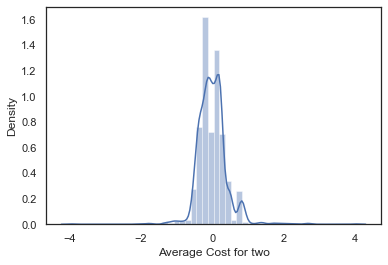

In [166]:
sns.distplot(y_pred_grid-y_test)

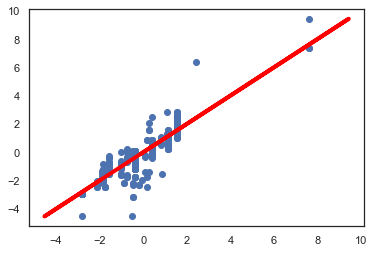

In [167]:
plt.scatter(y_pred_grid,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the best Model for Task 1

In [171]:
joblib.dump(grid_search.best_estimator_,'Average Cost for two Status.obj')

['Average Cost for two Status.obj']

,Y Test,Pred
4731,-0.129414,-0.394805
1468,0.527336,0.393073
9037,0.294374,0.393073
7866,-0.631380,-0.394805
5570,-0.005995,-0.394805
...,...,...
8149,0.377889,0.393073
5849,-0.005995,-0.394805
9019,0.203597,0.393073
742,1.064585,1.140789


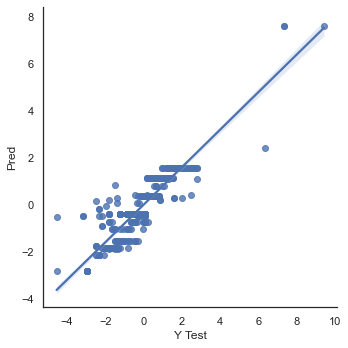

In [172]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data

# Task 2 : Predicting the Price Range

# Data Preprocessing for Classification problem for Task 2

In [174]:
# Separating feature data and Label data
Xp = new_Zomato_ct_dt.drop(['Is delivering now','Price range'],axis=1)
yp= new_Zomato_ct_dt['Price range']

In [176]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
Xp_Scalar= stdscalar.fit_transform(Xp)

In [177]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp_Scalar, yp, test_size = 0.20,random_state=42)
Xp_train.shape,Xp_test.shape,yp_train.shape,yp_test.shape

((7640, 21), (1911, 21), (7640,), (1911,))

# Build/Test multiple models for Task 2

In [194]:
#Using Logistic Regression to  train a logistic regression model on the training set
lpreg = LinearRegression()
lpreg.fit(X_train, y_train)
# Predicting the data model
lpreg_pred = lreg.predict(X_test) # Predicting the model
lpreg_pred.shape

(1911,)

In [195]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yp_test,lpreg_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yp_test,lpreg_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(yp_test,lpreg_pred))
print('\n')

Mean squared error: 3.9


Mean absolute error: 1.80


R2 Score: -3.75




In [196]:
 #Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(Xp_train,yp_train)
#Predicting the test set result
y_pred_svm=svm.predict(Xp_test)
y_pred_svm.shape

(1911,)

In [197]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yp_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yp_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(yp_test,y_pred_svm))
print('\n')

Mean squared error: 0.1


Mean absolute error: 0.24


R2 Score: 0.87




In [198]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor() #
clf.fit(Xp_train, yp_train)
clf_pred = clf.predict(Xp_test)
clf_pred.shape

(1911,)

In [199]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yp_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yp_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(yp_test,clf_pred))
print('\n')

Mean squared error: 0.0


Mean absolute error: 0.03


R2 Score: 0.98




In [200]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(Xp_train, yp_train)
et_xgb = xgbreg.predict(Xp_test)
et_xgb.shape

(1911,)

In [201]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yp_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yp_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(yp_test,et_xgb))
print('\n')

Mean squared error: 0.0


Mean absolute error: 0.03


R2 Score: 0.99




In [202]:
# Decision Tree
DT=tree.DecisionTreeClassifier()
DT.fit(Xp_train,yp_train)
y_pred_dt=DT.predict(Xp_test)
y_pred_dt.shape

(1911,)

In [203]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yp_test,y_pred_dt))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yp_test,y_pred_dt))
print('\n')
print('R2 Score: %.2f' % r2_score(yp_test,y_pred_dt))
print('\n')

Mean squared error: 0.0


Mean absolute error: 0.03


R2 Score: 0.97




# Cross Validation for all Models used for Task 2

In [210]:
# Cross validation for Task 2
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, Xp,yp):
    rmse =- (cross_val_score(model, Xp_Scalar,yp, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
          SVC(kernel='linear'),
         RandomForestClassifier(n_estimators=100, random_state=42),
         tree.DecisionTreeClassifier(random_state=42),
         XGBRegressor(random_state = 0),
         ]
          
          
names = ['LR', 'svr', 'RF','DT','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,Xp,yp)
          print("{}  : {:.6f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 47.339085, 36.785843
svr  : 36.766880, 31.892000
RF  : 23.280040, 28.954959
DT  : 18.578793, 27.547735
xgbreg  : 8.694358, 11.806555


# Hyper Parameter Tuning : GridSearchCV for Task 2

In [211]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [216]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(Xp_train, yp_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=50)
Best score: 0.9537809053952764
Best params: {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}


In [217]:
yp_pred_grid=grid_search.best_estimator_.predict(Xp_test) # With best parameter
yp_pred_grid.shape

(1911,)

In [219]:
print('MSE:',mean_squared_error(yp_pred_grid,yp_test))
print('MAE:',mean_absolute_error(yp_pred_grid,yp_test))
print('r2_score:',r2_score(yp_pred_grid,yp_test)*100)

MSE: 0.048575911379684415
MAE: 0.07976305378220691
r2_score: 93.66813530263953


<AxesSubplot:xlabel='Price range', ylabel='Density'>

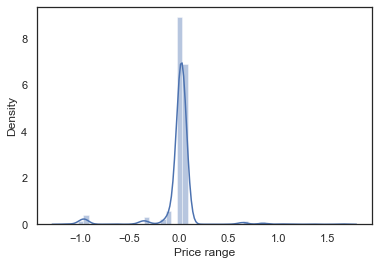

In [220]:
sns.distplot(yp_pred_grid-yp_test)

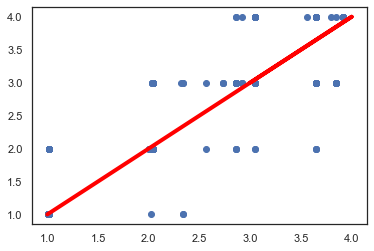

In [221]:
plt.scatter(yp_pred_grid,yp_test)
plt.plot(yp_test,yp_test,linewidth=4,color='Red')

# Saving the best Model for Task 2

In [222]:
joblib.dump(grid_search.best_estimator_,'Final Price.obj')

['Final Price.obj']

,Y Test,Pred
4731,1,1.013639
1468,2,2.032756
9037,2,2.032756
7866,1,1.013639
5570,1,1.013639
...,...,...
8149,2,2.032756
5849,1,1.013639
9019,2,2.032756
742,3,3.049997


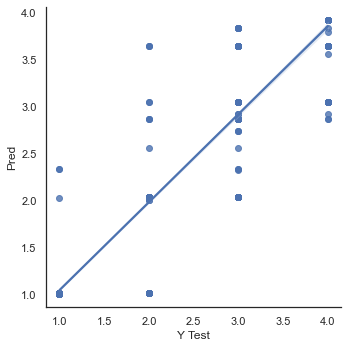

In [223]:
# Comparing the Actual price and predicted price
cmpp_data = pd.DataFrame({'Y Test':yp_test , 'Pred':yp_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmpp_data,palette='rainbow')
cmpp_data